# <span style="color:blue">Trie Data Structures
AWS CLOUD INSTITUTE: PROVIDED FOR EDUCATIONAL INSTRUCTIONAL PURPOSES ONLY.

A trie is a **tree structure** where **each node** represents **a character** of the alphabet. Trie is derived from the word retrieval, and it's **pronounced either “tree” or “try.”**

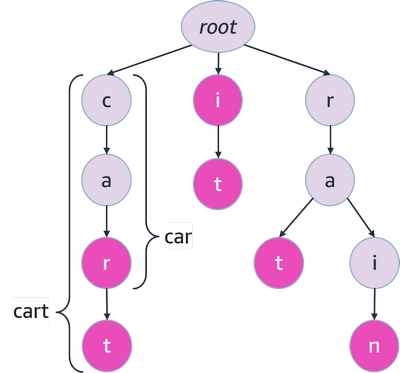


For **example**, the **Trie above**, represents the words **"car", "cart", "I", "it", "rat"** and **"rain"**.

Tries are **commonly used** for representing words, in **word completion** and **word searches". However they can **also** be used for any character. Representing **IP addresses** in a Trie is a common use case in IP routing

## Trie Implementation

## A Trie node Class
A **Trie node** needs **two key things**:
- A **dictionary or array** for **every possible character**, **pointing** to **potential children or None**
- An **indicator** that we are at the **end of a word**

Unlike other tree nodes, the **trie node doesn't always hold a "data"** field. **In this implementation**, there is no explict attribute to store a character. The **character** is **stored in** the **pointer**. In other words, a character is stored by having a non-null pointer for it.

For example, **looking at** our example **Trie above**:
- In the **root** node, **"c", "i", and "r"** would point to **not null** (None) values, and **all** the **other** ones would be **null**
- "c" would point to a node with an "a" pointer, and that path would  continue to represent "car" and "cart"
- Likewise, "i" and "r" would start paths to represent different words.

#### Case sensitivity
A **Trie** can implement **either case sensitive**, **or case-insensitive** searches. For a case sensitive search, "Hello" is diferrent than "hello", and "HELLO". On a case insensitive search, "hello", "Hello", and "HELLO" (and any other combination of upper and lower case letters) are considered the same word. There is not specific "best practice". It simply depends on whether your use case requires case sensitivity. **If** a Trie is **case-insensitive**, all **characters and word searches** should be **converted to lower case**, for a faster search.

### TrieNode
For our node class, we will use a **dictionary** to **store** the **character pointers**.

In [ ]:
class TrieNode: 
    """
    Trie Node class. Uses a dictionary to store character pointers.
    """ 
 
    def __init__(self): 
        # each node in the trie has a dictionary for child nodes 
        self.children = dict()
        
        # indicator for the end of a word 
        self.word_end = False

    def __str__(self):
        '''
        String representation of current characters in this node. Primarily used for debugging.
        '''
        return f"{self.children.keys()}"
        

### Trie Class
**Our Trie** class implementation will assume a **case-insensitive search**, so it will conver all characters to lower case.

In [ ]:
class Trie:
    '''
    A Binary Search Tree
    '''
    def __init__(self):
        # initialize the root of the tree
        self.root = TrieNode()

        # count the words in the trie (good for debugging)
        self._word_count = 0

    def insert(self, in_word):
        '''
        This method will insert a new word into our Trie. The word will be converted to 
        lower case, since our Trie is case insensitive.
        '''

        # convert the word to lower case
        new_word = in_word.lower()

        # start at the root
        curr_node = self.root

        # iterate through each character in the word
        for char in new_word:
            # if the character is not in the children dictionary, add it
            if char not in curr_node.children:
                curr_node.children[char] = TrieNode()

            # move to the child node
            curr_node = curr_node.children[char]

        # if the node already marked the end of a word, do nothing
        if not curr_node.word_end:
            # increment the word count
            self._word_count += 1
            # mark the end of a new word
            curr_node.word_end = True

    def find(self, search_word):
        '''
        Find a match for a single word in the Trie
        '''
        # convert the search word to lower case
        search_word = search_word.lower()

        # iterate through each character in the search word, in parallel with trie path
        curr_node = self.root
        for curr_char in search_word:
            # if there the current character has a pointer, move to next character
            if curr_char in curr_node.children:
                curr_node = curr_node.children[curr_char]
            else:
                # if the current character is not found, return False
                return False

        # if we get here without returning False, we found the word
        return True

    def prefix_search(self, prefix): 
        '''
        This method returns a list of all words in the Trie beginning with the given prefix, or
        an empty list if no words begin with that prefix.

        The prefix search has two key steps:
        - First we traverse the tree up to the node matching the prefix.
        - Then recursively traverse the tree, collecting all words ending at a node with word_end=True
        '''
        
        # convert the prefix to lower case
        prefix = prefix.lower()

        # start at the root
        curr_node = self.root

        # traverse the tree up to the prefix
        for char in prefix:
            # if the prefix is not found, return empty list
            if char not in curr_node.children:
                return []
            # move down the word path
            curr_node = curr_node.children[char]
        # at this point, we are at the node matching the prefix

        # recursively traverse the tree, collecting words
        words = []
        return self._find_words(curr_node, prefix, words)

    def _find_words(self, curr_node, curr_word, words):
        '''
        This method recursively traverse tries from a given node and builds a 
        list with all the complete words found in paths below.
        '''
        # if the current node marks the end of a word, add it to the list
        if curr_node.word_end:
            words.append(curr_word)

        # recursively traverse the trie for every possible character under current node
        for char, child_node in curr_node.children.items():
            # recursively look for words under this child (adding current character to word)
            self._find_words(child_node, curr_word + char, words)

        # return the words found
        return words

    def get_word_count(self):
        return self._word_count

    def print_trie(self):
        '''
        Prints a trie using recursion
        '''
        # start recursive method at the root
        self._print_trie(self.root, "", "")

    def _print_trie(self, curr_node, curr_word, current_prefix):
        '''
        Recursively prints a tree. A "current_prefix" is passed to indent the lines as we print.
        The method also accumulates the current word, to print when one completes.
        '''
        # Check if the current node is the end of a word
        if curr_node.word_end:
            print(f" (Word: {curr_word})")
        else:
            print()

        # iterater through each key,value pair in the three children
        for char, child_node in curr_node.children.items():
            print(f"{current_prefix} - {char}", end="")
            self._print_trie(child_node, curr_word + char, current_prefix + "   ")

### Quick Test
Just to confirm the tree is working, we'll start with the same example we saw in the diagram.

#### Create a Trie

In [ ]:
# create a new binary tree
test_trie= Trie()

#### Insert words and print

In [ ]:
# add words to Trie
test_trie.insert("Car")
test_trie.insert("Cart")
test_trie.insert("I")
test_trie.insert("it")
test_trie.insert("Rat")
test_trie.insert("rain")
test_trie.insert("Rap")

# print the Trie
print(f"Created trie with {test_trie.get_word_count()} words.")
test_trie.print_trie()

#### Find words
Let's look for some words in the Trie. Remember that **our tree is case insensitive**.

In [ ]:
# Look for words in the Trie
word1 = "car"
word2 = "Rain"
word3 = "Banana"
word4 = "cartoon"

if (test_trie.find(word1)):
    print(f"Found word: {word1}")
else:
    print(f"Did not find word: {word1}")

if (test_trie.find(word2)):
    print(f"Found word: {word2}")
else:
    print(f"Did not find word: {word2}")

if (test_trie.find(word3)):
    print(f"Found word: {word3}")
else:
    print(f"Did not find word: {word3}")

if (test_trie.find(word4)):
    print(f"Found word: {word4}")
else:
    print(f"Did not find word: {word4}")

#### Saving the best for last: prefix search
Let's try to find all matching words for a prefix.

##### Add a few more words to make it interesting

In [ ]:
test_trie.insert("carrot")
test_trie.insert("rapid")
test_trie.insert("iterate")

# print the Trie
print(f"Trie has {test_trie.get_word_count()} words.")
test_trie.print_trie()

In [ ]:
# Look for words in the Trie
word1 = "ca"
word2 = "ra"
word3 = "Banana"
word4 = "rain"
word5 = "it"

# get words matching prefix
words = test_trie.prefix_search(word1)
print(f"Possible words starting with \"{word1}\": {words}")

words = test_trie.prefix_search(word2)
print(f"Possible words starting with \"{word2}\": {words}")

words = test_trie.prefix_search(word3)
print(f"Possible words starting with \"{word3}\": {words}")

words = test_trie.prefix_search(word4)
print(f"Possible words starting with \"{word4}\": {words}")

words = test_trie.prefix_search(word5)
print(f"Possible words starting with \"{word5}\": {words}")

# <span style="color:blue"> OPTIONAL

## A realistic example

Let's try our Trie on a relatively large file. 

#### Choose a file to read.
For my example, I'll use a text version of the programmer's guide for my "Tucker Quest" game, which is a text based game I've used for examples earlier. The exact nature of the document is irrelevant, and it's just being used here because it's a 60 page document including regular text and code samples.

In [ ]:
filename = "tucker-quest-programming-guide.txt"

### Create a new Trie

In [ ]:
my_trie = Trie()

### Add document words to Trie
We'll read the entire document, and add every word into the Trie. 

In [ ]:
import string

# open the file to read
with open(filename, 'r') as file:
    # read each line
    for line in file:
        # split the line into words
        words = line.split()
        # iterate through words in the line
        for word in words:
            # remove punctuation
            word = word.strip(string.punctuation)            
            # if the word is alphabetic (only letters) add it to trie
            if word.isalpha():
                my_trie.insert(word)

# print word count to verify creation
print(f"Created trie with {my_trie.get_word_count()} words.")

### Find words
Let's look for some words in the Trie. Remember that our tree is case insensitive.

**PLEASE NOTE** that the **cell** below **will keep asking for words** in a loop. **To exit** the loop you'll need to **enter "q"**, or stop the cell at the notebook.

In [ ]:
search_word = ""
while search_word != "q":
    search_word = input("\nEnter a word to search for (or 'q' to quit): ")
    if search_word != "q":
        if my_trie.find(search_word):
            print(f"Found word: {search_word}")
        else:
            print(f"Did not find word: {search_word}")

### Search for words matching prefix
Let's look for all words in the Trie matching a prefix.

**PLEASE NOTE** that the **cell** below **will keep asking for words** in a loop. **To exit** the loop you'll need to **enter "q"**, or stop the cell at the notebook.

In [ ]:
word_prefix = ""
while word_prefix != "q":
    word_prefix = input("\nEnter a word to search for (or 'q' to quit): ")
    if word_prefix != "q":
        if my_trie.prefix_search(word_prefix):
            print(f"Possible words starting with \"{word_prefix}\": {my_trie.prefix_search(word_prefix)}")
        else:
            print(f"No words found starting with \"{word_prefix}\"")

#### Using *prefix_search* auto-completion

The **Trie structure** you see above **could be** easily **used for** a typical **auto-completion** feature we are accustumed to see. In this text notebook, we need to click *[Enter]* to submit a word. However, any **web page input field can be coded** to **react to** a **character** being **entered**. Therefore all we would need to do is to **invoke our** ***prefic_search()*** method **anytime** the **user enters** a new **character** in the input field.